<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/Complex_Systems_Lab_GA_Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import random
import numpy as np
import matplotlib.pyplot as plt
def bar(a):
    x = np.arange(a.shape[0])
    fig, ax = plt.subplots()
    plt.bar(x, a)
    # plt.xticks(x, ('0', '1', '2', '3', '4','5', '6', '7', '8', '9'))
    plt.show()

In [7]:
def print_sudoku(state):
    border = "------+-------+------"
    rows = [state[i:i+9] for i in range(0,81,9)]
    for i,row in enumerate(rows):
        if i % 3 == 0:
            print(border)
        three = [row[i:i+3] for i in range(0,9,3)]
        print(" | ".join(
            " ".join(str(x or "_") for x in one)
            for one in three
        ))
    print(border)

In [2]:
# http://lipas.uwasa.fi/~timan/sudoku/
# https://convert.town/replace-spaces-with-commas

In [3]:
problem = np.array([
0,4,0,0,0,0,1,7,9,
0,0,2,0,0,8,0,5,4,
0,0,6,0,0,5,0,0,8,
0,8,0,0,7,0,9,1,0,
0,5,0,0,9,0,0,3,0,
0,1,9,0,6,0,0,4,0,
3,0,0,4,0,0,7,0,0,
5,7,0,1,0,0,2,0,0,
9,2,8,0,0,0,0,6,0])

In [4]:
# problem = np.array([
# 0,0,0,0,0,3,0,1,7,
# 0,1,5,0,0,9,0,0,8,
# 0,6,0,0,0,0,0,0,0,
# 1,0,0,0,0,7,0,0,0,
# 0,0,9,0,0,0,2,0,0,
# 0,0,0,5,0,0,0,0,4,
# 0,0,0,0,0,0,0,2,0,
# 5,0,0,6,0,0,3,4,0,
# 3,4,0,2,0,0,0,0,0])

In [5]:
# problem = np.array([
# 1,0,0,0,0,7,0,9,0,
# 0,3,0,0,2,0,0,0,8,
# 0,0,9,6,0,0,5,0,0,
# 0,0,5,3,0,0,9,0,0,
# 0,1,0,0,8,0,0,0,2,
# 6,0,0,0,0,4,0,0,0,
# 3,0,0,0,0,0,0,1,0,
# 0,4,0,0,0,0,0,0,7,
# 0,0,7,0,0,0,3,0,0])

In [6]:
problem

array([0, 4, 0, 0, 0, 0, 1, 7, 9, 0, 0, 2, 0, 0, 8, 0, 5, 4, 0, 0, 6, 0,
       0, 5, 0, 0, 8, 0, 8, 0, 0, 7, 0, 9, 1, 0, 0, 5, 0, 0, 9, 0, 0, 3,
       0, 0, 1, 9, 0, 6, 0, 0, 4, 0, 3, 0, 0, 4, 0, 0, 7, 0, 0, 5, 7, 0,
       1, 0, 0, 2, 0, 0, 9, 2, 8, 0, 0, 0, 0, 6, 0])

In [8]:
print_sudoku(problem)

------+-------+------
_ 4 _ | _ _ _ | 1 7 9
_ _ 2 | _ _ 8 | _ 5 4
_ _ 6 | _ _ 5 | _ _ 8
------+-------+------
_ 8 _ | _ 7 _ | 9 1 _
_ 5 _ | _ 9 _ | _ 3 _
_ 1 9 | _ 6 _ | _ 4 _
------+-------+------
3 _ _ | 4 _ _ | 7 _ _
5 7 _ | 1 _ _ | 2 _ _
9 2 8 | _ _ _ | _ 6 _
------+-------+------


In [9]:
problem

array([0, 4, 0, 0, 0, 0, 1, 7, 9, 0, 0, 2, 0, 0, 8, 0, 5, 4, 0, 0, 6, 0,
       0, 5, 0, 0, 8, 0, 8, 0, 0, 7, 0, 9, 1, 0, 0, 5, 0, 0, 9, 0, 0, 3,
       0, 0, 1, 9, 0, 6, 0, 0, 4, 0, 3, 0, 0, 4, 0, 0, 7, 0, 0, 5, 7, 0,
       1, 0, 0, 2, 0, 0, 9, 2, 8, 0, 0, 0, 0, 6, 0])

In [10]:
fixed = np.where(problem)[0]

In [11]:
fixed

array([ 1,  6,  7,  8, 11, 14, 16, 17, 20, 23, 26, 28, 31, 33, 34, 37, 40,
       43, 46, 47, 49, 52, 54, 57, 60, 63, 64, 66, 69, 72, 73, 74, 79])

In [12]:
def block_indices(block_num):
    firstrow = (block_num // 3) * 3
    firstcol = (block_num % 3) * 3
    indices = [ 9*(firstrow+i) + (firstcol+j) for i in range(3) for j in range(3)]
    return indices

In [13]:
def randomize_on_zeros(problem):
    solution = problem.copy()
    for block in range(9):
        indices = block_indices(block)
        block = problem[indices]
        zeros = [i for i in indices if problem[i] == 0]
        to_fill = [i for i in range(1, 10) if i not in block]
        random.shuffle(to_fill)
        for index, value in zip(zeros, to_fill):
            solution[index] = value
    return solution

In [14]:
fixed

array([ 1,  6,  7,  8, 11, 14, 16, 17, 20, 23, 26, 28, 31, 33, 34, 37, 40,
       43, 46, 47, 49, 52, 54, 57, 60, 63, 64, 66, 69, 72, 73, 74, 79])

In [15]:
block_indices(0)

[0, 1, 2, 9, 10, 11, 18, 19, 20]

In [16]:
A = [i for i in block_indices(0) if i not in fixed]

In [17]:
A

[0, 2, 9, 10, 18, 19]

In [18]:
def move(state):
    
    state2 = state.copy()

    A = [i for i in block_indices(random.randrange(9)) if i not in fixed] # Don't move starting numbers
    
    m, n = random.sample(A, 2) #swap number within block

    state2[m], state2[n] = state2[n], state2[m]
    return state2

In [19]:
def f(x):
    #Counts duplicates in rows and cols
    x = x.reshape(9,9)
    L = 0
    for i in range(9):
        L += 9 - len(np.unique(x[i,:]))
        L += 9 - len(np.unique(x[:,i]))
    return L

In [20]:
print_sudoku(problem)

------+-------+------
_ 4 _ | _ _ _ | 1 7 9
_ _ 2 | _ _ 8 | _ 5 4
_ _ 6 | _ _ 5 | _ _ 8
------+-------+------
_ 8 _ | _ 7 _ | 9 1 _
_ 5 _ | _ 9 _ | _ 3 _
_ 1 9 | _ 6 _ | _ 4 _
------+-------+------
3 _ _ | 4 _ _ | 7 _ _
5 7 _ | 1 _ _ | 2 _ _
9 2 8 | _ _ _ | _ 6 _
------+-------+------


In [29]:
state = randomize_on_zeros(problem)

In [30]:
print_sudoku(state)

------+-------+------
9 4 5 | 3 7 1 | 1 7 9
8 7 2 | 4 9 8 | 2 5 4
3 1 6 | 2 6 5 | 3 6 8
------+-------+------
2 8 4 | 4 7 3 | 9 1 8
3 5 7 | 1 9 5 | 2 3 7
6 1 9 | 8 6 2 | 5 4 6
------+-------+------
3 6 1 | 4 5 2 | 7 1 9
5 7 4 | 1 3 8 | 2 8 4
9 2 8 | 6 9 7 | 3 6 5
------+-------+------


In [23]:
t = np.linspace(0,1,1000000)
cooling_schedule = np.exp(-5*t)

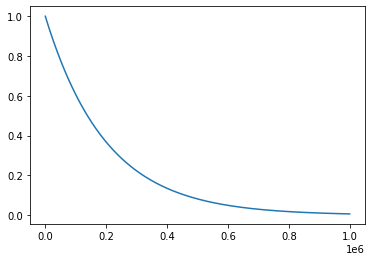

In [24]:
plt.plot(cooling_schedule)

In [ ]:
best = 100
best_state = state
for T in cooling_schedule:

    state2 = move(state)

    delta = f(state) - f(state2) 

    if delta > 0 or  np.exp( delta / T) > np.random.random():

        state = state2
        
        if f(state) < best:
            best = f(state)
            best_state = state
            print(f(state))
            if best == 0:
                break

In [26]:
print_sudoku(state)

------+-------+------
8 4 5 | 6 3 2 | 1 7 9
7 3 2 | 9 1 8 | 6 5 4
1 9 6 | 7 4 5 | 3 2 8
------+-------+------
6 8 3 | 5 7 4 | 9 1 2
4 5 7 | 2 9 1 | 8 3 6
2 1 9 | 8 6 3 | 5 4 7
------+-------+------
3 6 1 | 4 2 9 | 7 8 5
5 7 4 | 1 8 6 | 2 9 3
9 2 8 | 3 5 7 | 4 6 1
------+-------+------


In [27]:
print_sudoku(problem)

------+-------+------
_ 4 _ | _ _ _ | 1 7 9
_ _ 2 | _ _ 8 | _ 5 4
_ _ 6 | _ _ 5 | _ _ 8
------+-------+------
_ 8 _ | _ 7 _ | 9 1 _
_ 5 _ | _ 9 _ | _ 3 _
_ 1 9 | _ 6 _ | _ 4 _
------+-------+------
3 _ _ | 4 _ _ | 7 _ _
5 7 _ | 1 _ _ | 2 _ _
9 2 8 | _ _ _ | _ 6 _
------+-------+------


# GA

In [33]:
problem

array([0, 4, 0, 0, 0, 0, 1, 7, 9, 0, 0, 2, 0, 0, 8, 0, 5, 4, 0, 0, 6, 0,
       0, 5, 0, 0, 8, 0, 8, 0, 0, 7, 0, 9, 1, 0, 0, 5, 0, 0, 9, 0, 0, 3,
       0, 0, 1, 9, 0, 6, 0, 0, 4, 0, 3, 0, 0, 4, 0, 0, 7, 0, 0, 5, 7, 0,
       1, 0, 0, 2, 0, 0, 9, 2, 8, 0, 0, 0, 0, 6, 0])

In [34]:
print_sudoku(problem)

------+-------+------
_ 4 _ | _ _ _ | 1 7 9
_ _ 2 | _ _ 8 | _ 5 4
_ _ 6 | _ _ 5 | _ _ 8
------+-------+------
_ 8 _ | _ 7 _ | 9 1 _
_ 5 _ | _ 9 _ | _ 3 _
_ 1 9 | _ 6 _ | _ 4 _
------+-------+------
3 _ _ | 4 _ _ | 7 _ _
5 7 _ | 1 _ _ | 2 _ _
9 2 8 | _ _ _ | _ 6 _
------+-------+------


In [35]:
fixed

array([ 1,  6,  7,  8, 11, 14, 16, 17, 20, 23, 26, 28, 31, 33, 34, 37, 40,
       43, 46, 47, 49, 52, 54, 57, 60, 63, 64, 66, 69, 72, 73, 74, 79])

In [36]:
state

array([9, 4, 5, 3, 7, 1, 1, 7, 9, 8, 7, 2, 4, 9, 8, 2, 5, 4, 3, 1, 6, 2,
       6, 5, 3, 6, 8, 2, 8, 4, 4, 7, 3, 9, 1, 8, 3, 5, 7, 1, 9, 5, 2, 3,
       7, 6, 1, 9, 8, 6, 2, 5, 4, 6, 3, 6, 1, 4, 5, 2, 7, 1, 9, 5, 7, 4,
       1, 3, 8, 2, 8, 4, 9, 2, 8, 6, 9, 7, 3, 6, 5])

In [37]:
state = randomize_on_zeros(problem)

In [38]:
print_sudoku(state)

------+-------+------
9 4 3 | 7 2 6 | 1 7 9
8 7 2 | 4 1 8 | 6 5 4
5 1 6 | 3 9 5 | 2 3 8
------+-------+------
4 8 7 | 2 7 4 | 9 1 7
6 5 3 | 5 9 8 | 5 3 8
2 1 9 | 3 6 1 | 6 4 2
------+-------+------
3 6 1 | 4 9 7 | 7 1 9
5 7 4 | 1 2 5 | 2 3 4
9 2 8 | 3 8 6 | 8 6 5
------+-------+------


In [64]:
p  = 100 #Number of Agents
x  = np.zeros((p,state.shape[0]))  #Agents State Array 
fx = np.zeros((p,)) #Agents Fitness Array 

for i in range(p):
    x[i] = randomize_on_zeros(problem)
    fx[i] = f(x[i]) 

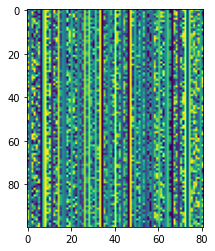

In [65]:
plt.imshow(x)

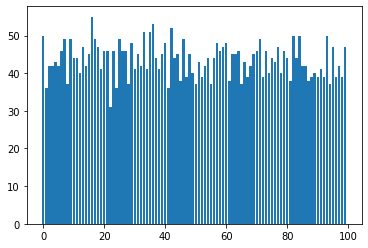

In [67]:
bar(fx)

In [71]:
s = np.argsort(fx)

In [72]:
x  = x[s]
fx = fx[s]

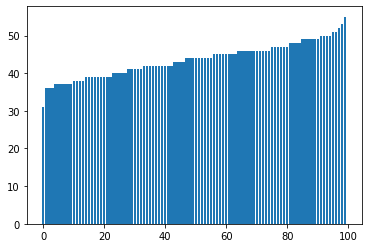

In [73]:
bar(fx)

In [75]:
for i in range(p//10,p):
    x[i] = move(x[i])
    fx[i] = f(x[i])

In [81]:
print(np.min(fx))

2.0


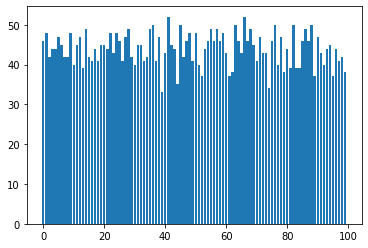

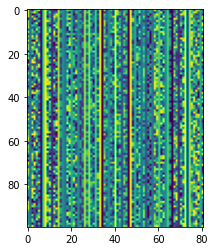

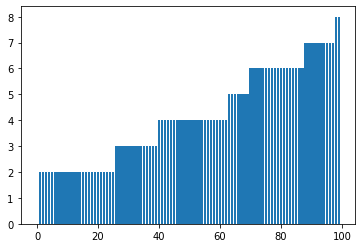

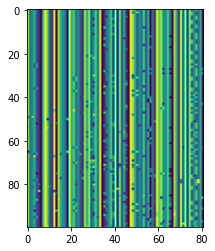

In [94]:
p  = 100 #Number of Agents
x  = np.zeros((p,state.shape[0]))  #Agents State Array 
fx = np.zeros((p,)) #Agents Fitness Array
fx_best = 100 

for i in range(p):
    x[i] = randomize_on_zeros(problem)
    fx[i] = f(x[i])

bar(fx)
plt.imshow(x)

for j in range(5000):

    #sort list
    s  = np.argsort(fx)
    x  = x[s]
    fx = fx[s]
    fx_best = np.min(fx)
    if fx_best == 0:
        break

    #copy best solutions
    x[p//2:] = x[:p//2]
    fx[p//2:] = fx[:p//2]

    #mutate solutions 
    for i in range(p//2,p):
        x[i] = move(x[i])
        fx[i] = f(x[i])

bar(fx)
plt.imshow(x)

In [95]:
fx

array([0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5.,
       5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8., 8.])